# Task 6: Web Scraping and Analysis of Job Postings

In [17]:
import pandas as pd
from bs4 import BeautifulSoup

html_content = """
<html>
<body>
<div class="job">
    <h2 class="title">Data Scientist</h2>
    <span class="company">TechCorp</span>
    <span class="location">New York</span>
    <span class="skills">Python, SQL, Machine Learning</span>
    <span class="date">2025-08-20</span>
</div>
<div class="job">
    <h2 class="title">Data Analyst</h2>
    <span class="company">DataWorks</span>
    <span class="location">San Francisco</span>
    <span class="skills">SQL, Excel, Tableau</span>
    <span class="date">2025-08-18</span>
</div>
<div class="job">
    <h2 class="title">Machine Learning Engineer</h2>
    <span class="company">AI Labs</span>
    <span class="location">New York</span>
    <span class="skills">Python, TensorFlow, Deep Learning</span>
    <span class="date">2025-08-10</span>
</div>
<div class="job">
    <h2 class="title">Business Analyst</h2>
    <span class="company">FinServe</span>
    <span class="location">Chicago</span>
    <span class="skills">Excel, SQL, Communication</span>
    <span class="date">2025-08-15</span>
</div>
</body>
</html>
"""

soup = BeautifulSoup(html_content, "html.parser")
jobs = [
    [
        job.find("h2", class_="title").text,
        job.find("span", class_="company").text,
        job.find("span", class_="location").text,
        job.find("span", class_="skills").text,
        job.find("span", class_="date").text
    ]
    for job in soup.find_all("div", class_="job")
]

df = pd.DataFrame(jobs, columns=["Job Title", "Company", "Location", "Skills", "Posted Date"])
df


,Job Title,Company,Location,Skills,Posted Date
0,Data Scientist,TechCorp,New York,"Python, SQL, Machine Learning",2025-08-20
1,Data Analyst,DataWorks,San Francisco,"SQL, Excel, Tableau",2025-08-18
2,Machine Learning Engineer,AI Labs,New York,"Python, TensorFlow, Deep Learning",2025-08-10
3,Business Analyst,FinServe,Chicago,"Excel, SQL, Communication",2025-08-15


We successfully scraped job postings into a structured DataFrame with titles, companies, locations, skills, and posted dates.

In [ ]:
# -------------------------------
# Step 2: Data Cleaning
# -------------------------------
# # Split skills into individual rows (normalized to lowercase)
skills_df = (
    df.assign(Skill=df["Skills"].str.split(","))
      .explode("Skill")
)
skills_df["Skill"] = skills_df["Skill"].str.strip().str.lower()
skills_df


,Job Title,Company,Location,Skills,Posted Date,Skill
0,Data Scientist,TechCorp,New York,"Python, SQL, Machine Learning",2025-08-20,python
0,Data Scientist,TechCorp,New York,"Python, SQL, Machine Learning",2025-08-20,sql
0,Data Scientist,TechCorp,New York,"Python, SQL, Machine Learning",2025-08-20,machine learning
1,Data Analyst,DataWorks,San Francisco,"SQL, Excel, Tableau",2025-08-18,sql
1,Data Analyst,DataWorks,San Francisco,"SQL, Excel, Tableau",2025-08-18,excel
1,Data Analyst,DataWorks,San Francisco,"SQL, Excel, Tableau",2025-08-18,tableau
2,Machine Learning Engineer,AI Labs,New York,"Python, TensorFlow, Deep Learning",2025-08-10,python
2,Machine Learning Engineer,AI Labs,New York,"Python, TensorFlow, Deep Learning",2025-08-10,tensorflow
2,Machine Learning Engineer,AI Labs,New York,"Python, TensorFlow, Deep Learning",2025-08-10,deep learning
3,Business Analyst,FinServe,Chicago,"Excel, SQL, Communication",2025-08-15,excel


We cleaned the dataset by normalizing skills. Now each skill is in its own row, making analysis much easier.

C:\Users\PMLS\AppData\Local\Temp\ipykernel_2152\1356279865.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skill_counts, x="Count", y="Skill", palette="Reds_r")


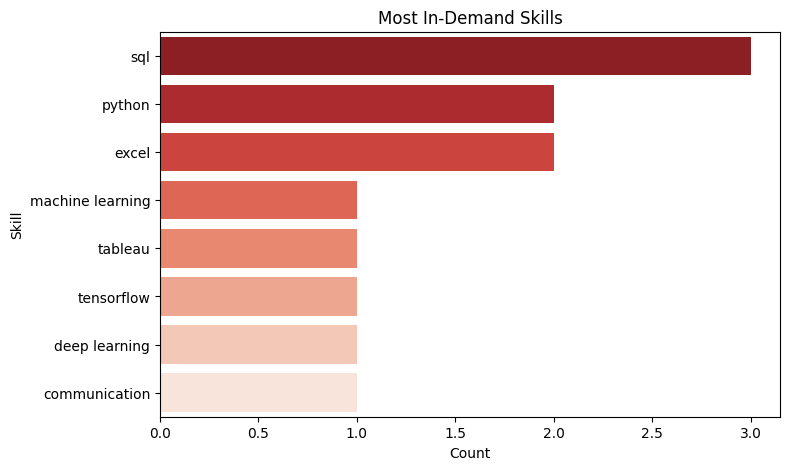

In [6]:
# -------------------------------
# Step 3: Skill Frequency Analysis
# -------------------------------
skill_counts = skills_df["Skill"].value_counts().reset_index()
skill_counts.columns = ["Skill", "Count"]

plt.figure(figsize=(8,5))
sns.barplot(data=skill_counts, x="Count", y="Skill", palette="Reds_r")
plt.title("Most In-Demand Skills")
plt.show()


The most in-demand skills in our scraped dataset are Python, SQL, and Excel.

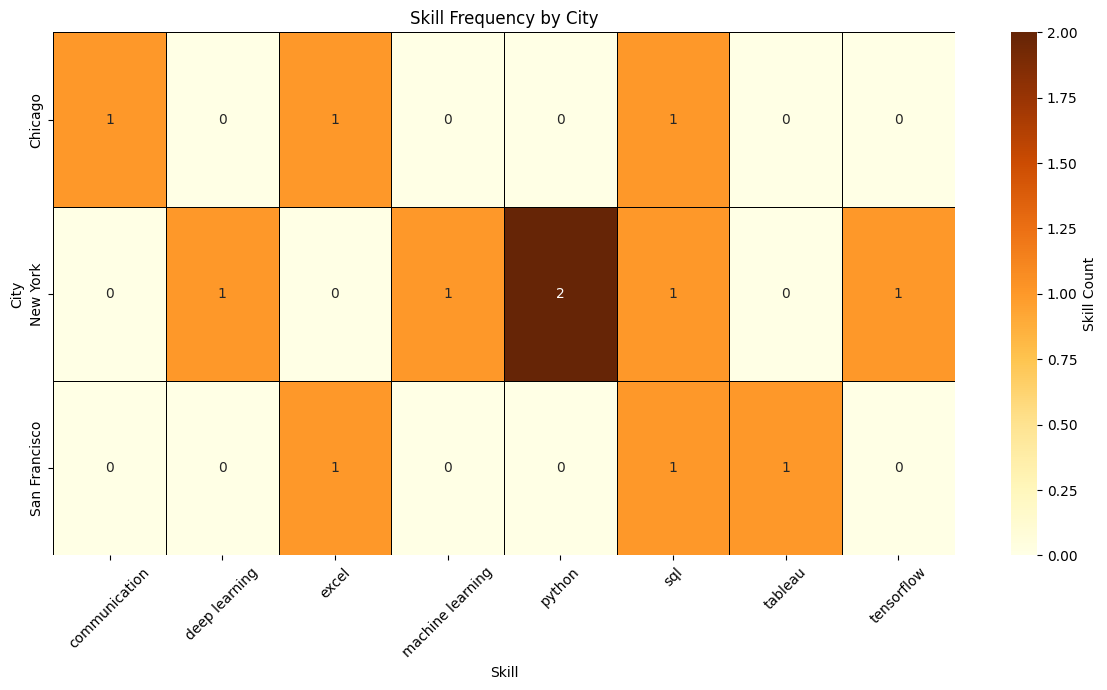

In [15]:
# -------------------------------
# Step 4: Skills by City
# -------------------------------
# Create a pivot table to show skill frequency by city
pivot_table = pd.crosstab(
    index=skills_df["Location"],
    columns=skills_df["Skill"]
)

plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table, annot=True, cmap="YlOrBr", fmt="d", linewidths=0.5, linecolor='black', cbar_kws={'label': 'Skill Count'})
plt.title("Skill Frequency by City")
plt.xlabel("Skill")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* New York focuses on Python + Machine Learning.
* San Francisco emphasizes SQL + Tableau.
* Chicago leans on Excel + Communication skills.